## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data preparation</a></li>
<li><a href="#kpi">Calculating KPI's</a></li>
<li><a href="#kpi_insights">Generating Insights from KPI's</a></li>
<li><a href="#insights">Conclusion with Data Driven Insights</a></li>
</ul>


<a id='intro'></a>
## Introduction

This aim of A/B testing analysis is to helps the business to furthur understand and find the best marketing campaign approach in converting its target customers in actual customers

### About the data

We are using two datasets of two different types of marketing campains called 
- Control campaigns
- Test campaigns
<br>
<br>
Each dataset contain the same features. They are:
<br>
- Camapign name
- Date of specific campaign
- Number of impressions for each campaign
- Reach of each campaign
- Number of website clicks
- Number of searches 
- Number of views on the content
- Number of times it results in "Add to Cart"
- Yhe number of purchases from each campaign

<a id='wrangling'></a>
## Data Preparation

#### Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#changing working directory
os.chdir('C:\\Users\\Richard\\Downloads\\Data\\ab testing')
# Print the current working directory

#### Loading datasets

In [3]:
control = pd.read_csv('control_group.csv')
test    = pd.read_csv('test_group.csv')

In [4]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


#### Dataset wrangling

After looking at the imformation of the two datasets we spot the following data issues

Data wrangling issues:
- rename features
- convert date fefature to datatime datatype
- missing values in the control dataset

In [6]:
## Renaming features
control.columns = ['campaign_name','date','amount_spent', 'impressions','reach','website_clicks','searches','content_view','added_to_cart','purchases']
test.columns    = ['campaign_name','date','amount_spent', 'impressions','reach','website_clicks','searches','content_view','added_to_cart','purchases']

In [7]:
## converting date features to datetime datatype
control['date'] = pd.to_datetime(control['date'])
test['date']   = pd.to_datetime(test['date'])

In [8]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_name   30 non-null     object        
 1   date            30 non-null     datetime64[ns]
 2   amount_spent    30 non-null     int64         
 3   impressions     29 non-null     float64       
 4   reach           29 non-null     float64       
 5   website_clicks  29 non-null     float64       
 6   searches        29 non-null     float64       
 7   content_view    29 non-null     float64       
 8   added_to_cart   29 non-null     float64       
 9   purchases       29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_name   30 non-null     object        
 1   date            30 non-null     datetime64[ns]
 2   amount_spent    30 non-null     int64         
 3   impressions     30 non-null     int64         
 4   reach           30 non-null     int64         
 5   website_clicks  30 non-null     int64         
 6   searches        30 non-null     int64         
 7   content_view    30 non-null     int64         
 8   added_to_cart   30 non-null     int64         
 9   purchases       30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


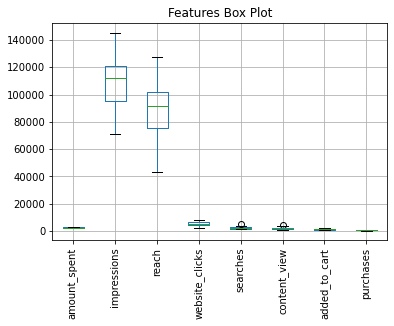

In [76]:
#checking for outliers
control.boxplot();
plt.xticks(rotation=90);
plt.title('Features Box Plot');

Since our data dosent contain outliers and we have only one missing value per column its safe to replace our missing values with the mean

In [11]:
#numbers of missing values 
control.isna().sum()

campaign_name     0
date              0
amount_spent      0
impressions       1
reach             1
website_clicks    1
searches          1
content_view      1
added_to_cart     1
purchases         1
dtype: int64

In [12]:
#replacing the missing value in our datasets with the mean
columns = ['impressions','reach','website_clicks','searches','content_view','added_to_cart','purchases']
for i in columns:
    control[i].fillna(np.mean(control[i]),inplace=True)

In [13]:
control.isna().sum()

campaign_name     0
date              0
amount_spent      0
impressions       0
reach             0
website_clicks    0
searches          0
content_view      0
added_to_cart     0
purchases         0
dtype: int64

#### Merging our Control and Test Dataframe

In [14]:
control.head(2)

,campaign_name,date,amount_spent,impressions,reach,website_clicks,searches,content_view,added_to_cart,purchases
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-02-08,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0


In [15]:
test.head(2)

,campaign_name,date,amount_spent,impressions,reach,website_clicks,searches,content_view,added_to_cart,purchases
0,Test Campaign,2019-01-08,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-02-08,2542,100719,91236,4657,2359,1548,879,677


In [16]:
df = control.merge(test,how='outer').sort_values(by='date').reset_index().drop('index',axis=1)

In [17]:
df.head()

,campaign_name,date,amount_spent,impressions,reach,website_clicks,searches,content_view,added_to_cart,purchases
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Control Campaign,2019-02-08,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,Test Campaign,2019-02-08,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,Control Campaign,2019-03-08,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


<a id='kpi'></a>
## Calculating KPI's

In [82]:
#Cost Per Impression(CPI)
df['CPI'] = (df['amount_spent']/df['impressions']) *1000

#Click Through Rate(CTR)
df['CTR'] = (df['website_clicks']/df['impressions'])*100

#Cost Per Click(CPC)
df['CPC'] = (df['amount_spent']/df['website_clicks'])*100

#Conversion Rate(CR)
df['CR'] = (df['purchases']/df['website_clicks'])*100

#Cost Per Conversion(CPC)
df['CPConv'] = (df['amount_spent']/df['purchases'])

#Added to Cart Rate
df['ACR'] = (df['added_to_cart']/df['website_clicks'])*100




In [83]:
df.head()

,campaign_name,date,amount_spent,impressions,reach,website_clicks,searches,content_view,added_to_cart,purchases,CPI,CTR,CPC,CR,CPConv,ACR
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,27.568862,8.483471,32.497149,8.808438,3.689320,25.926454
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,76.055626,7.681416,99.012508,8.393680,11.796078,29.427255
2,Control Campaign,2019-02-08,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,14.515863,6.700264,21.664612,6.300863,3.438356,15.030826
3,Test Campaign,2019-02-08,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,25.238535,4.623755,54.584496,14.537256,3.754801,18.874812
4,Control Campaign,2019-03-08,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,17.788947,4.941121,36.001844,5.716042,6.298387,17.424708


In [103]:
#saving the combined dataframe with engineered features
df.to_csv('campaign.csv')

<a id='kpi_insights'></a>
## Generating Insights from KPI's

### 1. Lets calculate the Average Cost Per 1000 Impression, grouping it by the type of Marketing Campaign. 

In [23]:
campaign_cpi = df.groupby('campaign_name')['CPI'].mean().reset_index()
campaign_cpi

,campaign_name,CPI
0,Control Campaign,21.550149
1,Test Campaign,42.681041


#### Explanation:

Here, it shows that the Control campaign costs the business less per 1000 impression than the Test Campaign i.e With the Test Campaign it costs the business twice as much as the Control campaign.

<b><i>So the Control Campaign shows a better COST PER IMPRESSION Metric</i></b>

### 2. Let's Calculate the average CLick Through Rate, to find out which impression generates more website click (i.e determine which campaign generate more interaction with the website )

In [36]:
campaign_ctr = df.groupby('campaign_name')['CTR'].mean().reset_index()
campaign_ctr

,campaign_name,CTR
0,Control Campaign,5.087893
1,Test Campaign,10.242260


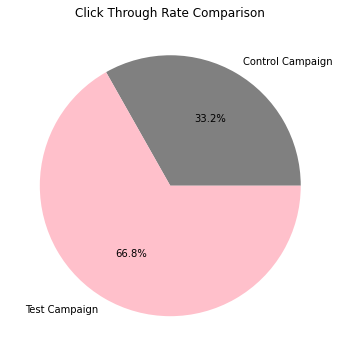

In [73]:
values = campaign_ctr['CTR']
labels = campaign_ctr['campaign_name']
colors = ['Grey','Pink']
plt.figure(figsize=(10,6))
plt.pie(values,labels=labels,autopct='%1.1f%%',colors=colors);
plt.title ("Click Through Rate Comparison");

#### Explanation:

Looking at the the Click through Rate Metric for both campaigns 66% of people that engaged with the website by clicking on the link are as a Result of the Test Campaign.

<b>The Test Campaign Perfoms well for better engagement.<i> i.e A Better Click Through Rate Metric</i> than the Control Metric</b>

### 3. Now, let’s calculate the average cost per click (CPC) for each Marketing campaign. And find out, which campaign costs less per click.

In [49]:
campaign_cpc = df.groupby('campaign_name')['CPC'].mean().reset_index()
campaign_cpc

,campaign_name,CPC
0,Control Campaign,48.990673
1,Test Campaign,46.871784


#### Explanation:

Both the Control and Test Camapign cost approximately the same amount(~49) per 100 clicks to the increase engagements with their website i.e more website clicks 

<b>But, Control campaign is a slightly costlier than the Test campaign for 100 click. So, with low CPC, <i>Test campaign seems good for the business<i/>.</b>

### 4. Now, we can compare the rate at which visiting customers add atleast oneproduct to their cart. Let’s find out which campaign shows better ACR

In [56]:
campaign_acr = df.groupby('campaign_name')['ACR'].mean().reset_index()
campaign_acr

,campaign_name,ACR
0,Control Campaign,27.707909
1,Test Campaign,15.791233


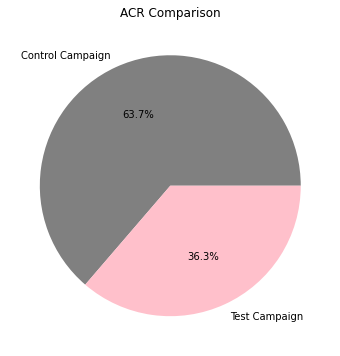

In [72]:
values = campaign_acr['ACR']
labels = campaign_acr['campaign_name']
colors = ['Grey','Pink']
plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, autopct='%1.1f%%',colors=colors)
plt.title('ACR Comparison')
plt.show()


#### Explanation:

The Charts table shows the Control Campaigns has a larger pull in convincing its customer in adding a particular item/product to its cart. i.e Majority of customers(63.7%) that clicked on the website and added a product to their cart is as a result of the Control campaign 

<b><i> The Control Campaign has a higher Add to Cart Metric</i></b>

### 5. Now, Let’s look one of the most important metric, comparing the conversion rate (CR) of both the marketing campaigns and findout which campaign turns its Potential customers to an Actual Customers

In [62]:
campaign_cr = df.groupby('campaign_name')['CR'].mean().reset_index()
campaign_cr

,campaign_name,CR
0,Control Campaign,11.422146
1,Test Campaign,9.231182


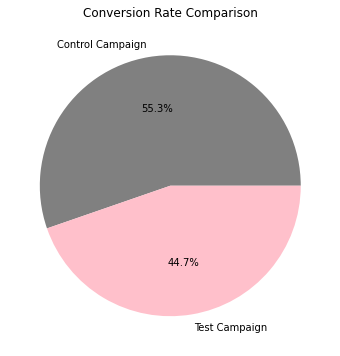

In [71]:
values = campaign_cr['CR']
labels = campaign_cr['campaign_name']
colors = ['Grey','Pink']
plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title('Conversion Rate Comparison')
plt.show()

#### Explanation:

Looking at the proportion of the customers the made a purchase as result of the marketing campaign. The Control campaign as the best Convertion Rate as 55.3% of customers that made purchases was a result of the Control Campaign

<b><i> Control Campaign as the highest Conversation Rate Metric </i></b>

### 6. Lastly, Let’s calculate the average amount paid for each conversion of visiting customerto an actual customer of both the campaigns. And, find out which costs less between the two marketing campaign

In [84]:
campaign_cpconv = df.groupby('campaign_name')['CPConv'].mean().reset_index()
campaign_cpconv

,campaign_name,CPConv
0,Control Campaign,5.000927
1,Test Campaign,5.899589


#### Explanantion:

In the above table, It shows that test campaign costs more than control campaign to secure acustomer. So, in this case, Control campaign seems better than test campaign.

<b><i>Control Campaign is a better Cost Per Conversation Metric. i.e its cost less to get an acutal customer</i></b>

<a id='insights'></a>
## CONCLUSION

### Insights
- The Control Campaign has lower average Cost Per Impression (CPI) compared  to the Test Campaign, signifying a lesser cost for generating a thousand impressions


- The Test Campaign has a higher Click Through Rate (CTR) avergae than The Control Campaign, suggesting the Test campaign appeals more to the customers curosity 

- The Test Campaign has a lower avergae Cost Per Click (CPC) than the Control Campaign i.e  It cost the business more in getting the customers to click through their website with the Control Campaign

- The Control Campaign has a higher Add to Cart (ACR) Metric than the Test Campaign, Stating more willingness to buy a product with the control campaign



- Control campaign exhibits a higher average Conversion Rate (CR) compared to the Test campaign,indicating a better rate of turning clicks into purchases.



- Test campaign has a higher average Cost per Conversion (CPConv) compared to the Control campaign, implying that conversions are more costly in the Test group.

#### Summary of the Insights

In [101]:
d = pd.DataFrame({'Cost Per Impression':['Lower Avg','Higher Avg'],'Click Through Rate':['Lower Avg','Higher Avg'],
             'Cost Per Conversion':['Lower Avg','Higher Avg'], 'Add To Cart Rate':['Higher Avg','Lower Avg'],
             "Conversion Rate":['Higher Avg','Lower Avg'],'Cost Per Conversion':['Lower Avg','Higher Avg'],
                  'Cost Per Click':['Higher Avg','Lower Avg'],
                 'Campaign Name':['Control Campaign',' Test Campaign']})
d.set_index('Campaign Name')

,Cost Per Impression,Click Through Rate,Cost Per Conversion,Add To Cart Rate,Conversion Rate,Cost Per Click
Campaign Name,,,,,,
Control Campaign,Lower Avg,Lower Avg,Lower Avg,Higher Avg,Higher Avg,Higher Avg
Test Campaign,Higher Avg,Higher Avg,Higher Avg,Lower Avg,Lower Avg,Lower Avg


### Conclution 


- If the Company wants to <b>increase its customer conversion </b> while <b>minimizing cost</b> Control Campaign is the best in achieiving that purpose due to Higher CR and lower CPC

- But if the companies just wants it improve its <b>Brand Awarness </b> the Test campaign is the best because of its higher Click Through Rate and Lower Cost Per Click